In [1]:
import numpy as np
import pickle
from scipy.ndimage import binary_dilation
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import random as rd
from matplotlib.colors import BoundaryNorm
import scipy
from tools import DataWrapper,load_file
plt.rcParams['figure.figsize'] = [20, 5]


In [2]:
DIR = os.path.abspath('')
HEATMAP_DIR = os.path.join(DIR, 'data','graphes')
PICTURES_DIR = os.path.join(DIR, 'data','images')


In [3]:
BACKGROUND_FILE = os.path.join(DIR,"data","graphes","1657880906.775549.doppler")
FILE_COUNT_TO_LOAD = 1000


timestamps_to_load = list([".".join(f.split(".")[:2]) for f in os.listdir(HEATMAP_DIR) if "doppler" in f])
timestamps_to_load = timestamps_to_load[0:min(FILE_COUNT_TO_LOAD,len(timestamps_to_load))]




dataWrapper = DataWrapper(HEATMAP_DIR, PICTURES_DIR, timestamps_to_load, picture_name_prefix="0", picture_extension_suffix="jpeg", heatmap_extension_suffix="doppler", heatmap_name_prefix="")



Loading picture data: 100%|██████████| 1000/1000 [00:07<00:00, 125.79it/s]


In [4]:
dataWrapper.set_background_data(BACKGROUND_FILE)

In [5]:
class Solution:
    def numIslands(self, grid) -> int:
        m = len(grid)
        n = len(grid[0])
        result = 0
        index_list = []
        shape_list = []
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    new_shape = []
                    result += 1
                    index_list.append([i, j])
                    
                    self.waterLands(grid, i, j, new_shape)
                    shape_list.append(list(new_shape))
        return result, index_list, shape_list
        
    
    #given the grid and start point, submerge the adjacent land
    def waterLands(self, grid, i, j,new_shape):
        m = len(grid)
        n = len(grid[0])
        grid[i][j] = 0
        new_shape.append([i,j])
        queue = [[i, j]]
        x_dir = [0,0,1,-1]
        y_dir = [1,-1,0,0]
        
        while queue:
            curr = queue.pop(0)
            cx = curr[0]
            cy = curr[1]
            
            for i in range(4):
                nx = cx + x_dir[i]
                ny = cy + y_dir[i]
                
                if nx >= 0 and nx < m and ny >= 0 and ny < n and grid[nx][ny] == 1:
                    queue.append([nx, ny])
                    grid[nx][ny] = 0
                    new_shape.append([nx,ny])
def energy(data):
    return np.sum(np.abs(data)**2)

def do_analysis(index):
    data = np.array(dataWrapper.heatmap_data[index])
    f_data = dataWrapper.filter(data)
    
    cfar,_,spotted = dataWrapper.CFAR_loaded(f_data)
    number_of_vehicles, pos, shape_list = Solution().numIslands(spotted)
    real_pos = []
    for shape in shape_list:
        real_pos.append(getPositionFromShapeAndData(shape, f_data))
    print(f"{number_of_vehicles} vehicles found. At positions {real_pos}")
    
    dataWrapper.plot_CFAR(index)
    
def getPositionFromShapeAndData(shape, data):
    """TODO: Calculate the incertitude

    Args:
        shape_list (_type_): _description_
        data (_type_): _description_

    Returns:
        _type_: _description_
    """
    most_energetic = shape[0]
    top_energy = data[most_energetic[0]][most_energetic[1]]
    
    for pixel_pos in shape:
        if data[pixel_pos[0]][pixel_pos[1]] > top_energy:
            most_energetic = pixel_pos
            top_energy = data[pixel_pos[0]][pixel_pos[1]]
    return most_energetic

In [6]:
sample_count = 3
sample_index = rd.sample(range(len(timestamps_to_load)), sample_count)

1.53E+13


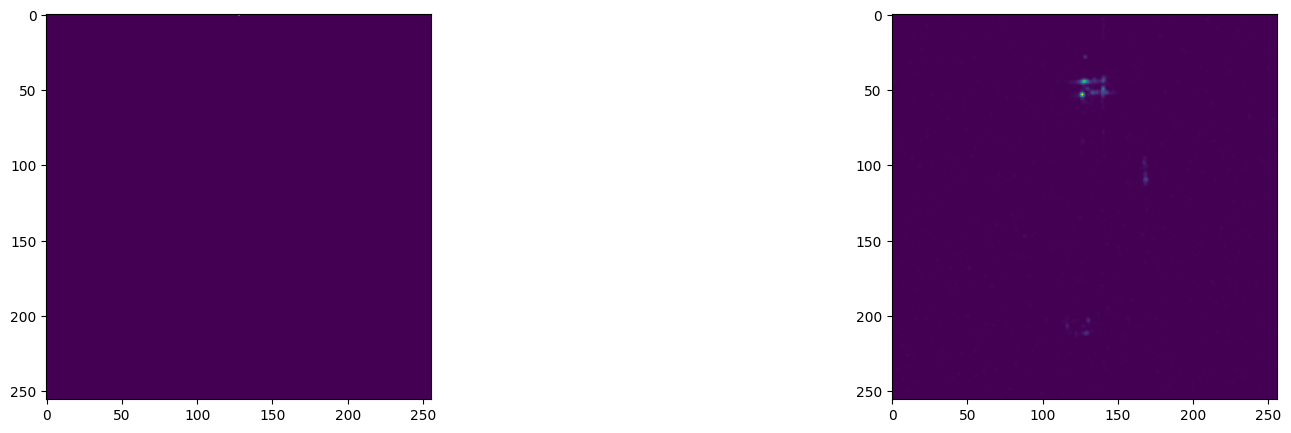

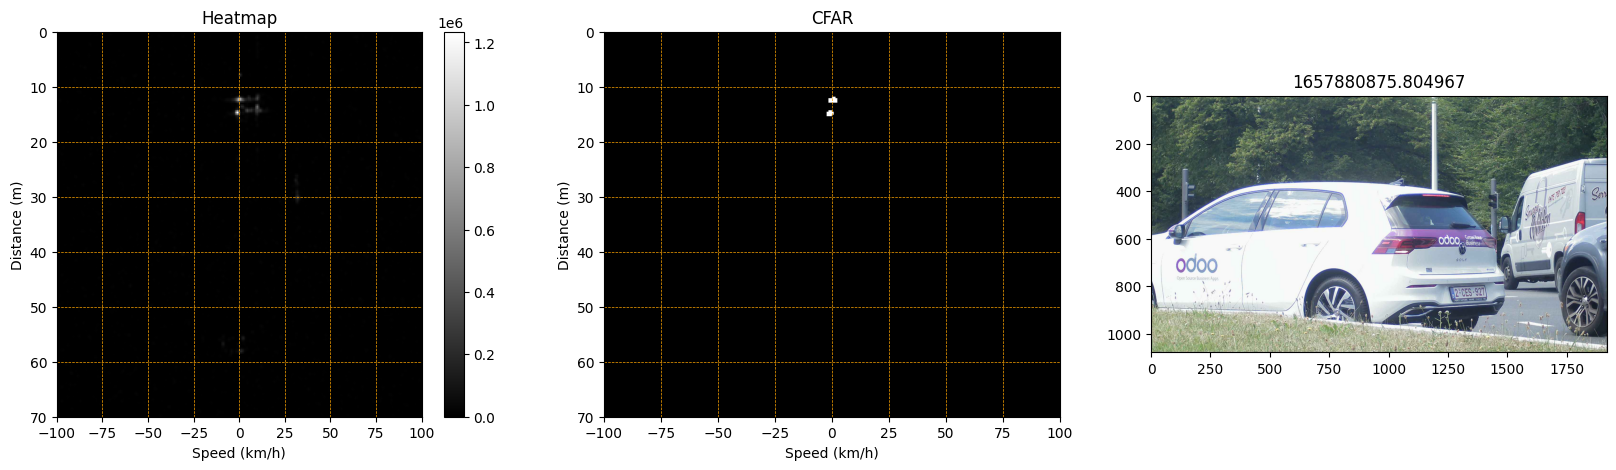

6.87E+11


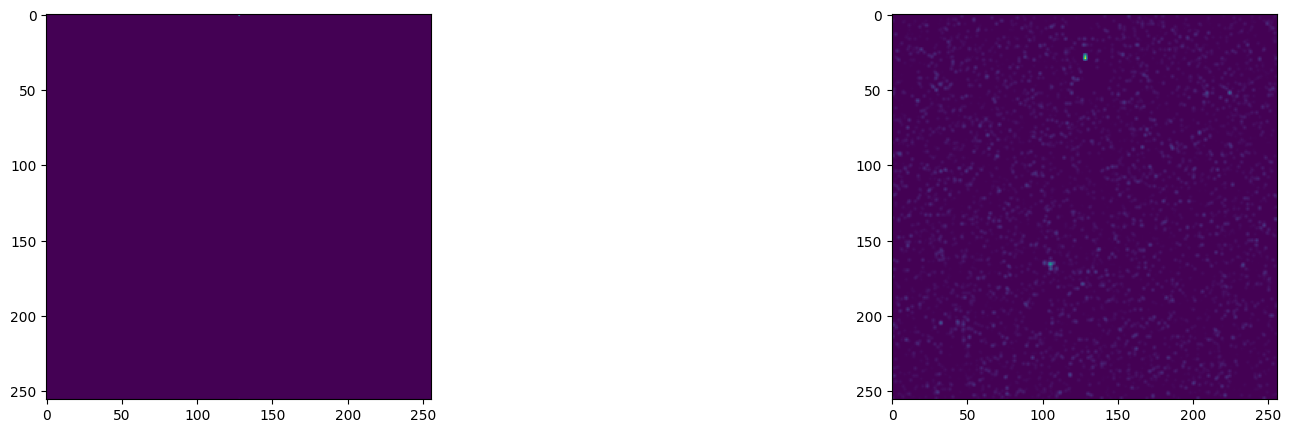

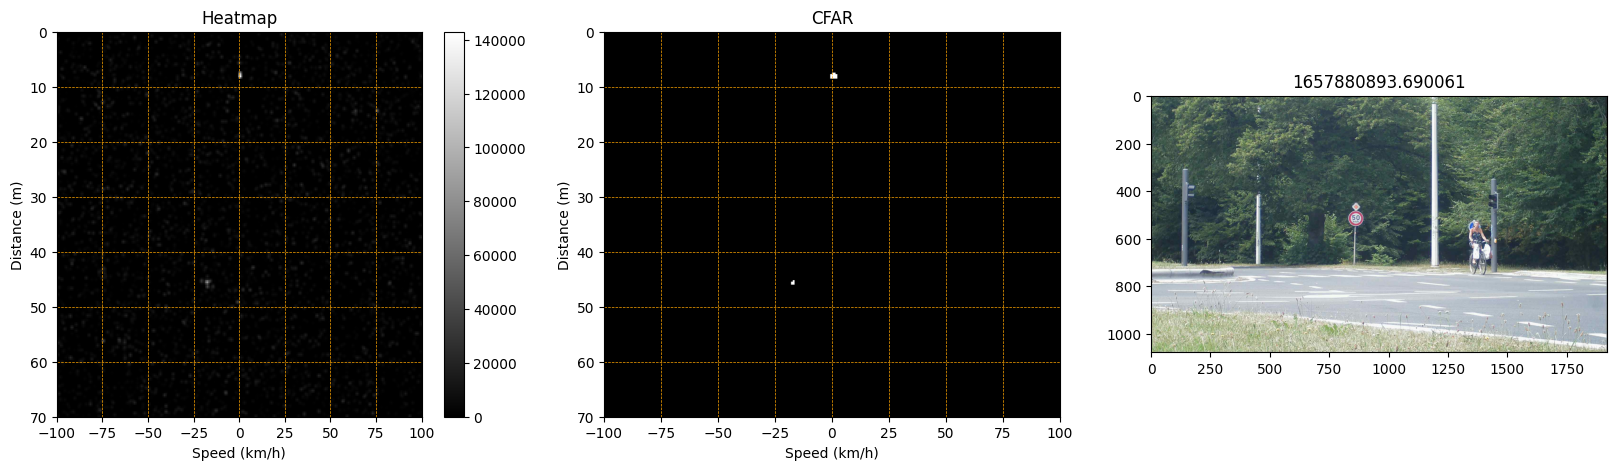

6.81E+11


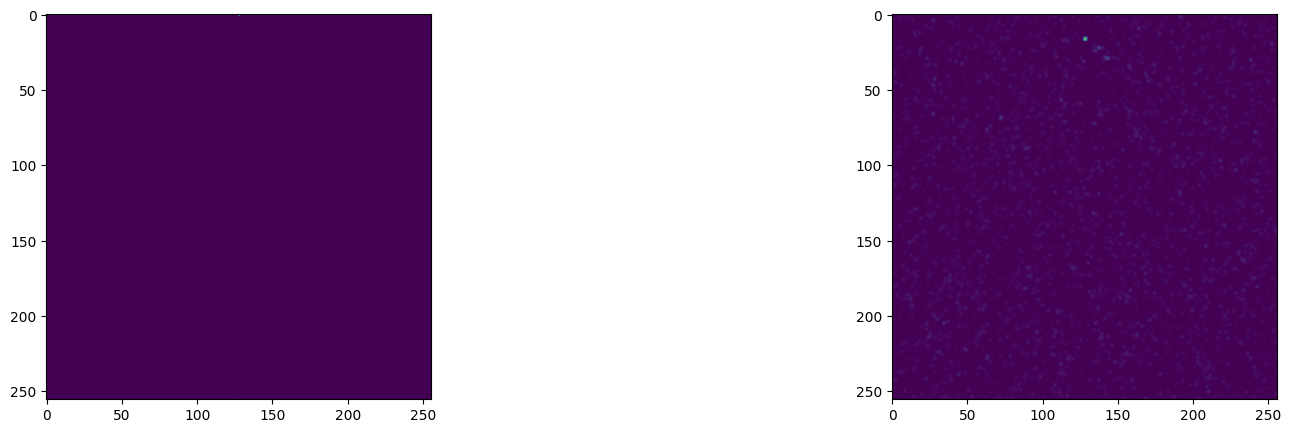

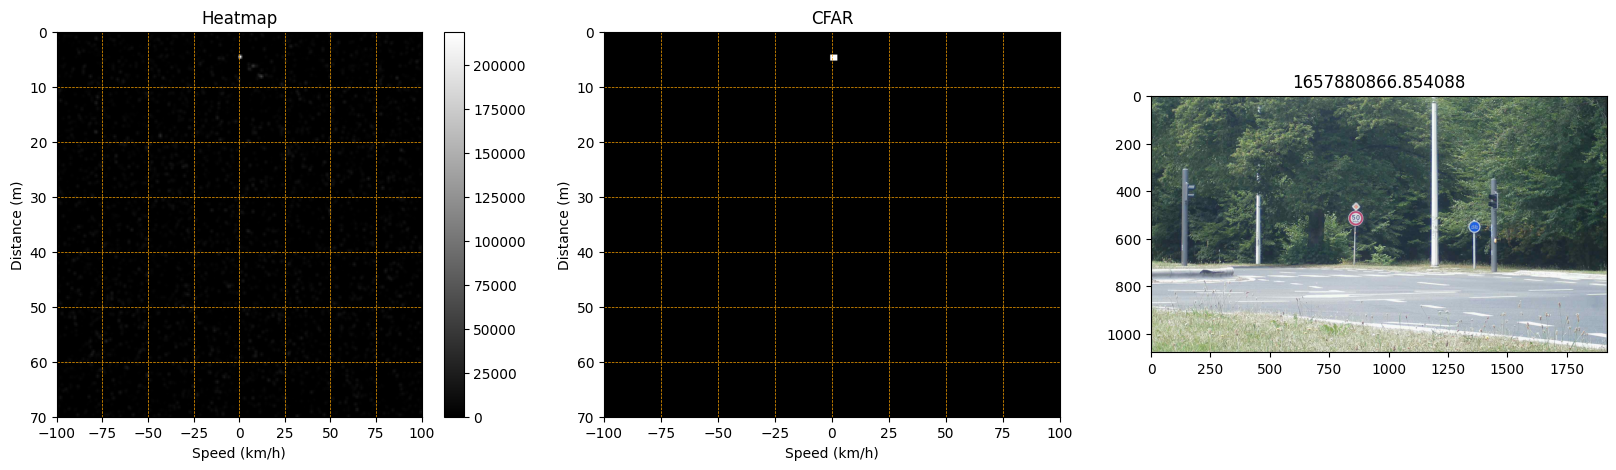

In [7]:
for i in sample_index:
    heatmap_data = dataWrapper.heatmap_data[i]
    filtered_data = dataWrapper.filter(heatmap_data)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(heatmap_data)
    plt.subplot(1,2,2)
    plt.imshow(filtered_data)
    print(f"{energy(filtered_data):.2E}")

    
    dataWrapper.plot_CFAR(i)

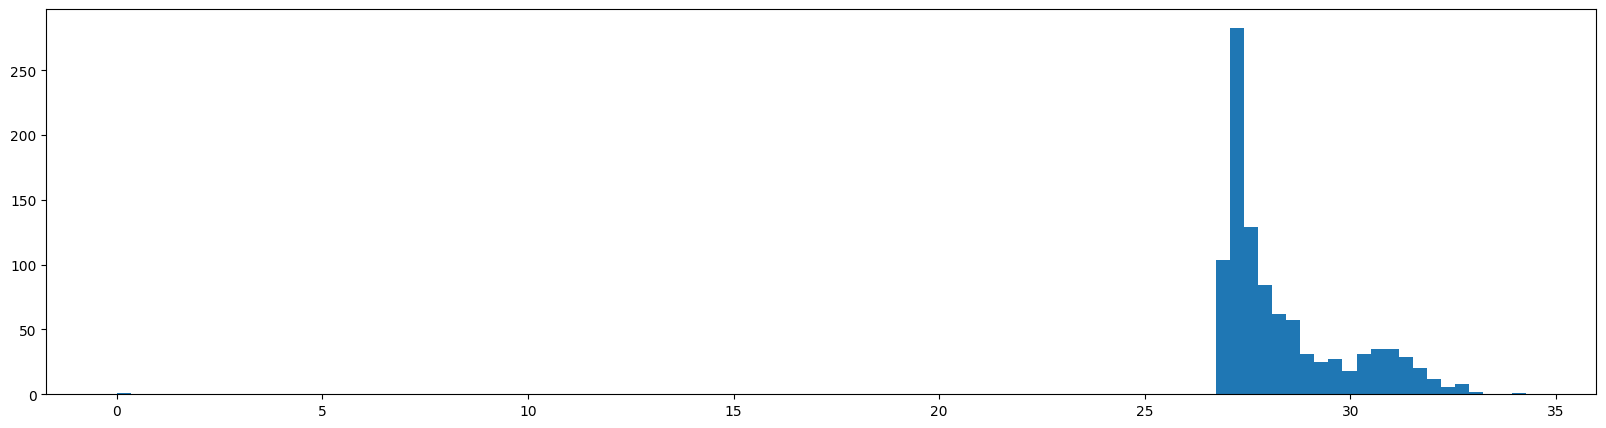

In [8]:
# Plot histogram of energy

energyList = []
HIST_SAMPLE_COUNT = min(1000,len(timestamps_to_load))

S = rd.sample(range(len(timestamps_to_load)),HIST_SAMPLE_COUNT)



for i in S:
    heatmap_data = dataWrapper.heatmap_data[i]
    filtered_data = dataWrapper.filter(heatmap_data)
    ener = np.log(int(energy(filtered_data))+1)
    energyList.append(ener)

plt.figure()
plt.hist(energyList, bins=100)
plt.show()

4 vehicles found. At positions [[44, 128], [52, 127], [56, 140], [55, 134]]


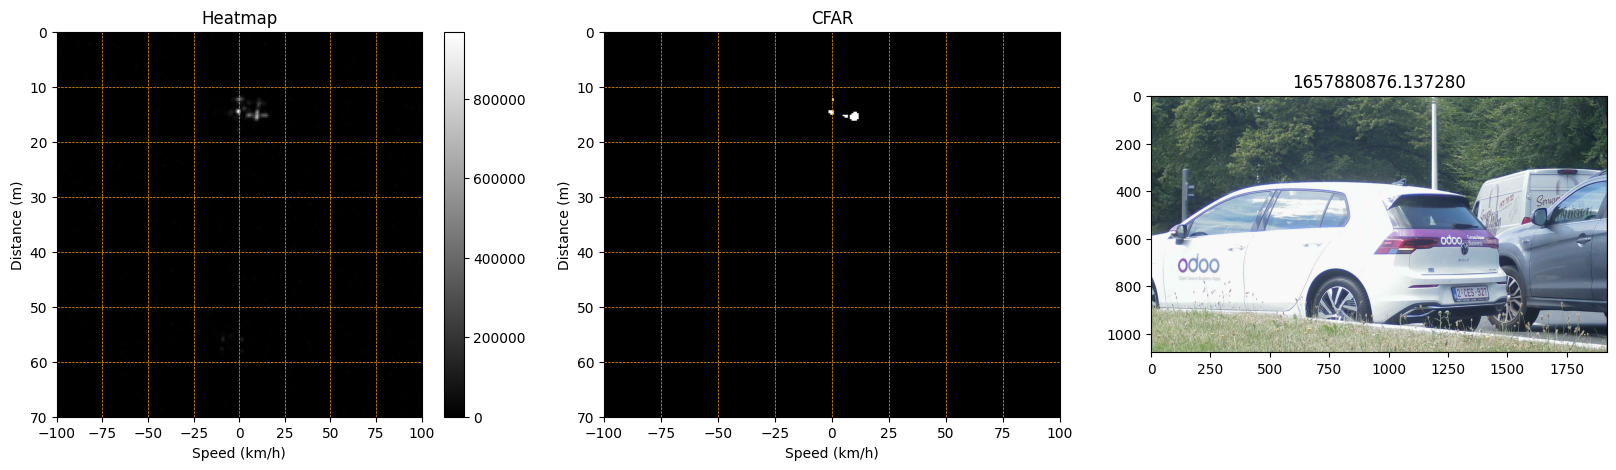

1 vehicles found. At positions [[45, 138]]


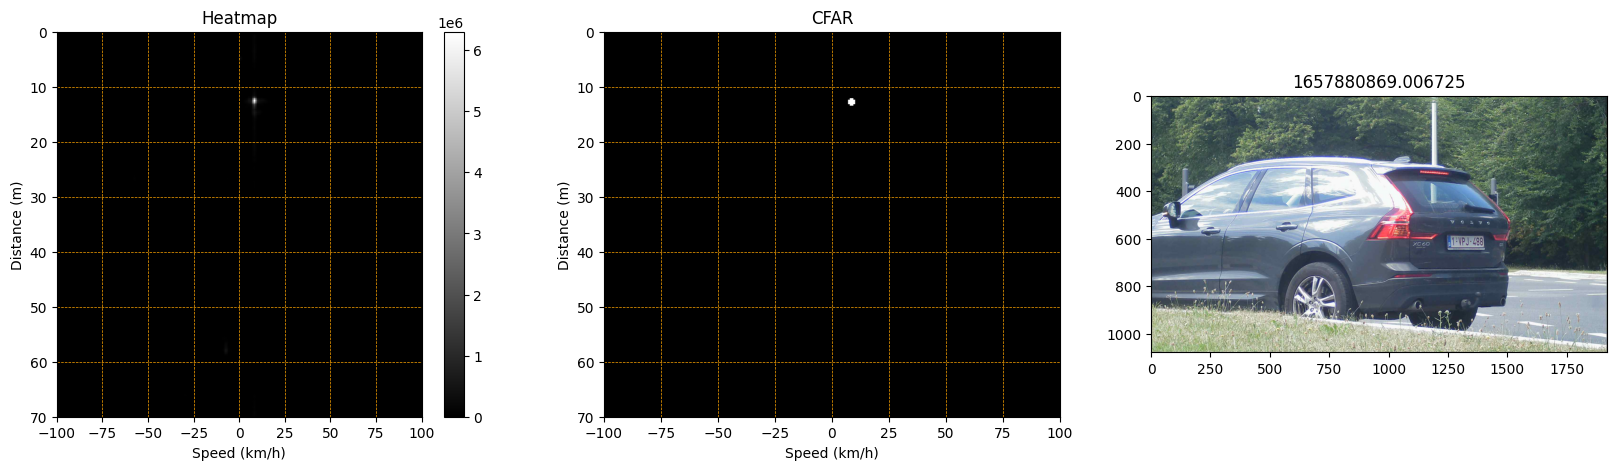

1 vehicles found. At positions [[83, 122]]


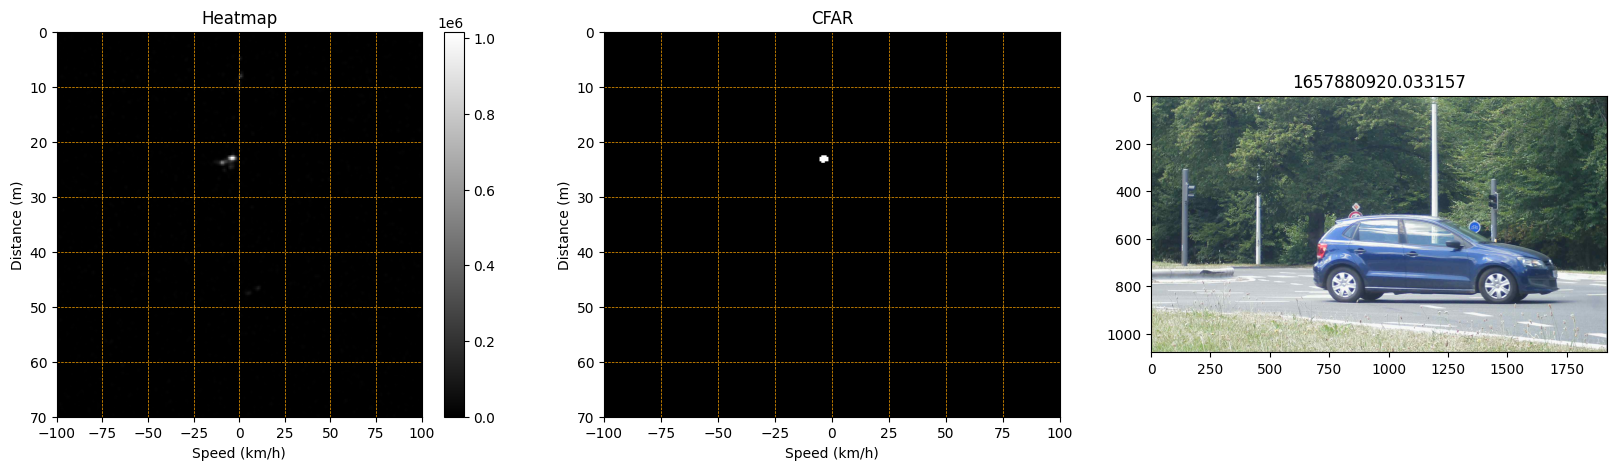

2 vehicles found. At positions [[82, 125], [83, 120]]


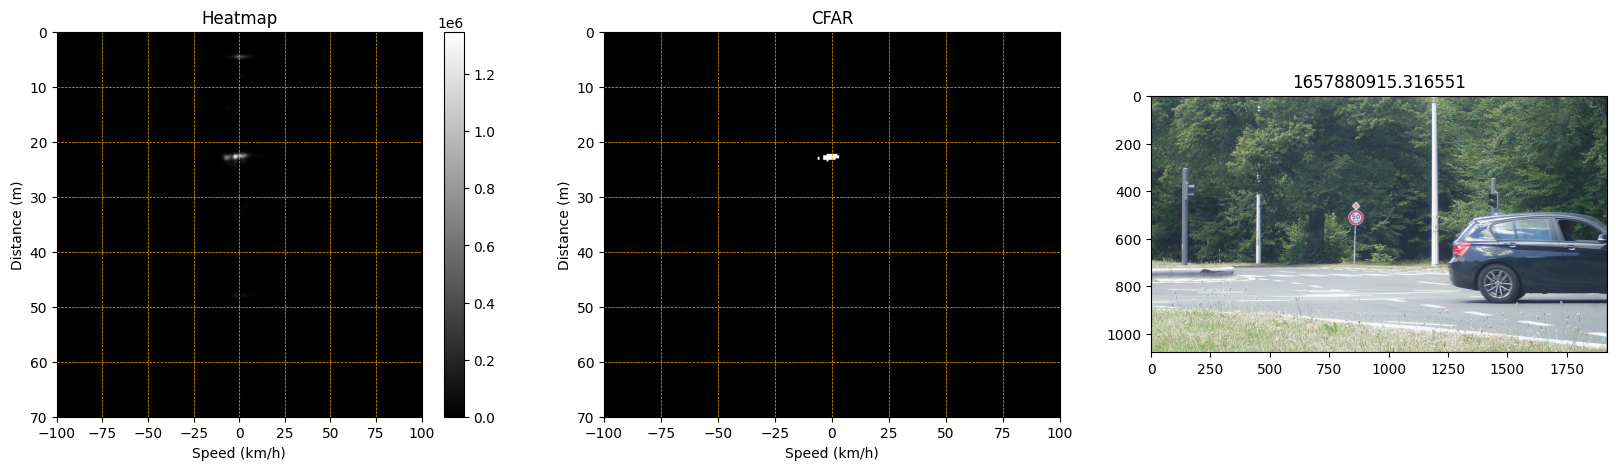

2 vehicles found. At positions [[160, 179], [225, 183]]


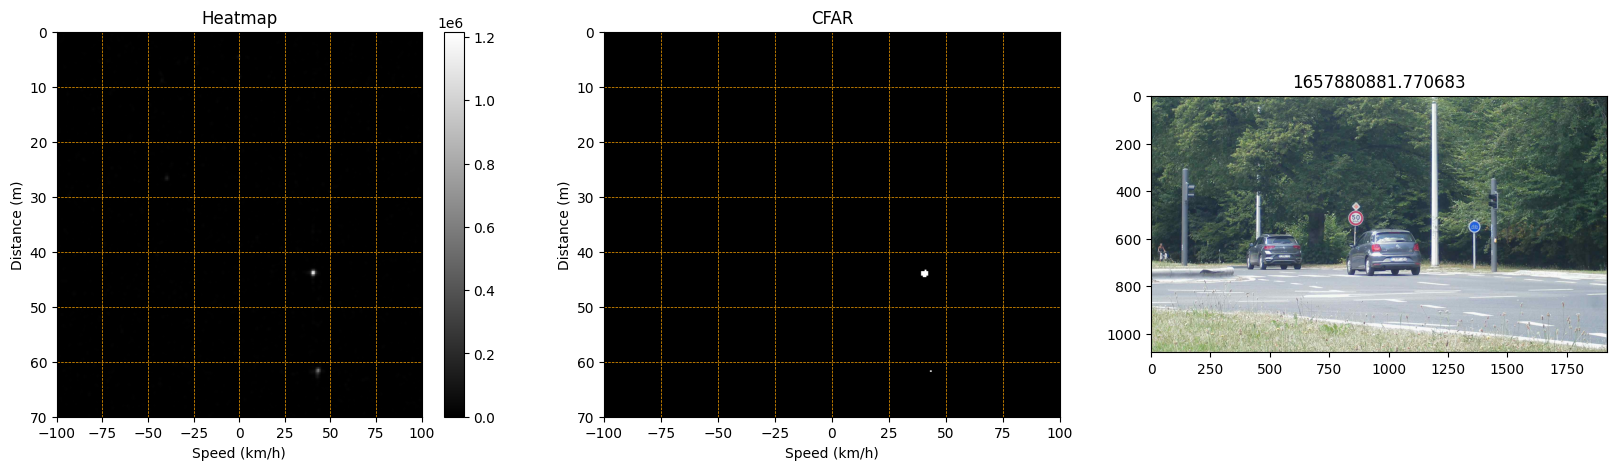

1 vehicles found. At positions [[44, 139]]


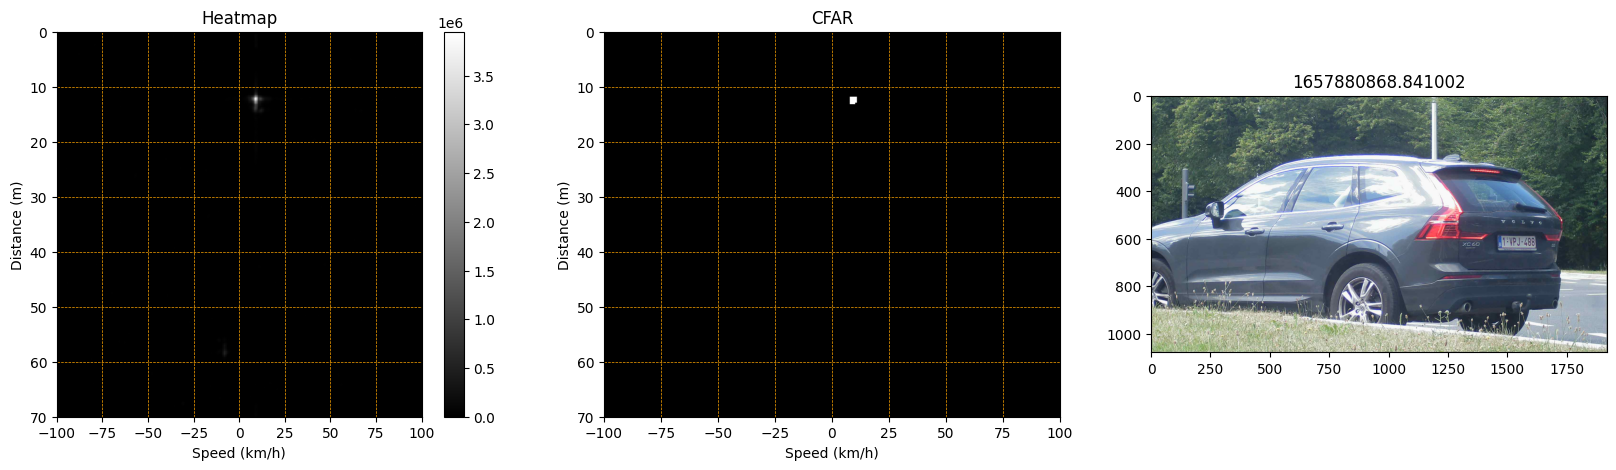

1 vehicles found. At positions [[163, 179]]


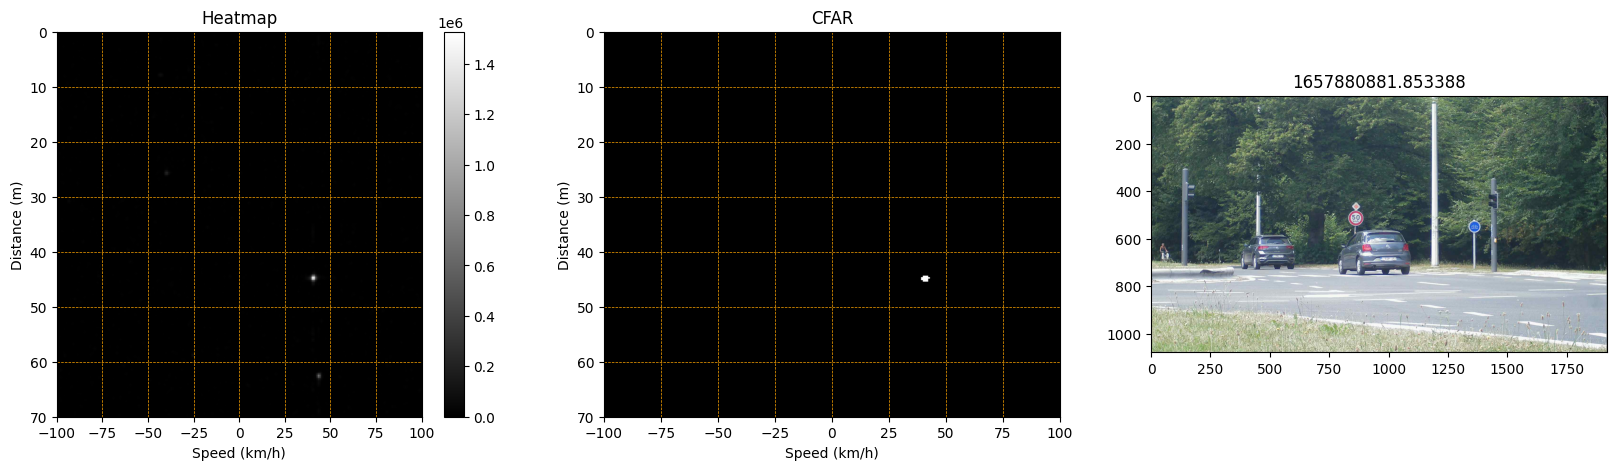

1 vehicles found. At positions [[45, 130]]


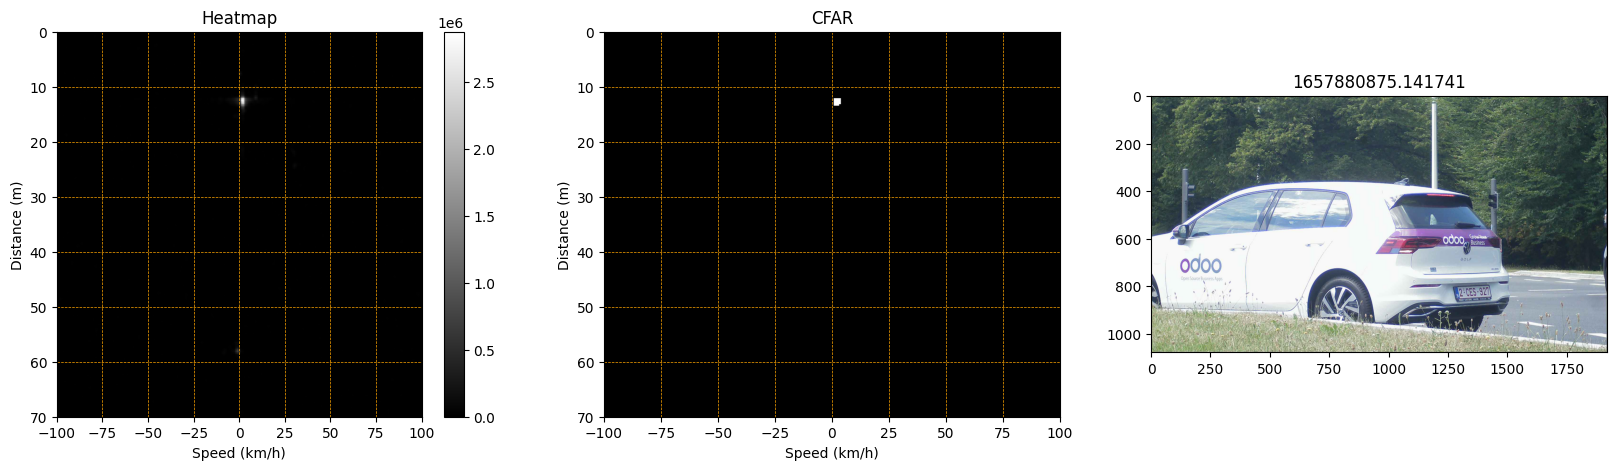

In [9]:
HIST_SAMPLE_COUNT = min(50,len(timestamps_to_load))

S = rd.sample(range(len(timestamps_to_load)),HIST_SAMPLE_COUNT)



for i in S:
    heatmap_data = dataWrapper.heatmap_data[i]
    filtered_data = dataWrapper.filter(heatmap_data)
    ener = np.log(int(energy(filtered_data))+1)
    if ener > 29:
        do_analysis(i)
        